# Загрузка данных

In [1]:
!pip install -q wldhx.yadisk-direct nltk pandarallel pymorphy2
!curl -L $(yadisk-direct https://disk.yandex.ru/d/Ihh18yf4807QPA) -o data.zip
!unzip data.zip

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  476M  100  476M    0     0  20.8M      0  0:00:22  0:00:22 --:--:-- 25.2M
Archive:  data.zip
  inflating: final_dataset.csv       


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import nltk
nltk.download('stopwords')
from pandarallel import pandarallel
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
pd.set_option('max_colwidth', -1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-2-e91363568f93>:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [3]:
df = pd.read_csv('final_dataset.csv' )

In [4]:
df.sample(5)

,title,text,topic,date
690298,Сирийская ракета распугала свадьбу в Израиле,"Одна из ракет сирийских систем противовоздушной обороны (ПВО) вызвала панику среди гостей свадьбы в Израиле. Видео случившегося опубликовано в YouTube. Сначала на празднике прозвучали сирены, а затем в небе заметили ракету. Жених и невеста вместе с гостями в спешке покинули зал. 10 мая Израиль два часа проводил бомбардировки в Сирии. В нападении было задействовано 28 израильских самолетов F-15 и F-16, которые выпустили по различным районам Сирии около 60 ракет класса «воздух-поверхность». Со стороны Израиля также было выпущено более 10 тактических ракет класса «земля-земля». Отмечалось, что сирийским системам ПВО удалось сбить более половины ракет.",Мир,2018/05/12
599878,Год жизни Земли уместили в короткое видео,"НАСА ужало до двухминутного ролика один год жизни Земли, снятой из космоса, с расстояния полтора миллиона километров. Видео было смонтировано из снимков, сделанных научным инструментом EPIC спутника DSCOVR. Аппарат в течение последнего года каждые два часа фотографировал Землю. Об этом сообщается на официальном канале агентства в YouTube. DSCOVR предназначен для слежения за космической погодой (солнечным ветром и корональными выбросами) и расположен в точке Лагранжа L1 системы Земля — Солнце. Аппарат был запущен с мыса Канаверал в феврале 2015 года при помощи ракеты-носителя Falcon 9 компании SpaceX.",Наука и техника,2016/07/22
684504,Сотрудник зоопарка стал добычей льва из-за глупой ошибки,"В Мексике сотрудника зоопарка задрал лев. Об этом сообщило издание The Mirror. Густаво Серрано Карабаха (Gustavo Serrano Carabaja) из города Тулансинго убирал клетку льва и после этого забыл закрыть ее на ключ. Хищная кошка выбралась наружу, напала на 28-летнего работника и вцепилась зубами ему в шею. Тело погибшего обнаружили другие работники. Представитель администрации города Фернандес Перес Ромеро (Fernandez Perez Romero) заявил журналистам, что убившего Карабаху 22-летнего льва по кличке Кимбо не будут усыплять. По его словам, власти разработают новые меры безопасности при работе с дикими животными в неволе. Семье погибшего будет оказана материальная помощь. Как утверждает Ромеро, в зоопарке совсем недавно провели работы по обеспечению безопасности: переделали клетку для львов и построили новый забор по периметру зоопарка. 13 марта сообщалось о тигре, растерзавшем вырастившего его служителя зоопарка. Инцидент произошел во время циркового представления в цирке китайского города Фучжоу.",Из жизни,2018/03/19
516383,Новые санкции США напомнили Нарышкину о Первой мировой войне,"Новые санкции США против России напомнили спикеру Госдумы Сергею Нарышкину о Первой мировой войне. Об этом сообщает ИТАР-ТАСС. По мнению спикера, направленные против России меры, о которых собирается объявить позднее в пятницу президент США Барак Обама, не имеют ничего общего с реальностью. «Есть цитата, в которой говорится, что если бы не было тех выстрелов в Сараево, все равно нашлись бы иные предлоги и поводы, чтобы начать Первую мировую войну. Все это перекликается с сегодняшним днем», — отметил Нарышкин. Ранее президент США Барак Обама объявил, что 12 сентября Вашингтон введет новые санкции. Они коснутся энергетического, финансового, а также оборонного секторов. Под новые санкции Вашингтона может попасть Сбербанк и пять других крупнейших банков страны, для которых ограничат доступ к американским капиталам. По мнению Белого дома, Россия занимается дестабилизацией ситуации на Украине. Отмену санкций Соединенные Штаты увязали с выполнением Москвой своих обязательств в соответствии с минскими договоренностями. США вводили санкции против России в четыре этапа. Они коснулись финансового, энергетического и оборонного секторов, а также ряда физических лиц. Поводом для введения санкций послужило присоединение Крыма к России, которое в Соединенных Штатах и Европе назвали незаконным, а также позиция Кремля в отношении конфликта на востоке Украины.",Россия,2014/09/12
613290,Счетная палата 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714940 entries, 0 to 714939
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   714940 non-null  object
 1   text    714935 non-null  object
 2   topic   714940 non-null  object
 3   date    714940 non-null  object
dtypes: object(4)
memory usage: 21.8+ MB


In [6]:
df.describe()

,title,text,topic,date
count,714940,714935,714940,714940
unique,712200,714006,11,7026
top,В Москве объявлено штормовое предупреждение,"РИА ""Новости""",Россия,2008/12/08
freq,21,291,160445,260


In [7]:
df['year'] = df.date.apply(lambda x: int(x.split('/')[0]))

In [8]:
l = sorted([i for i in Counter(df['year']).items()], key=lambda x: x[0])

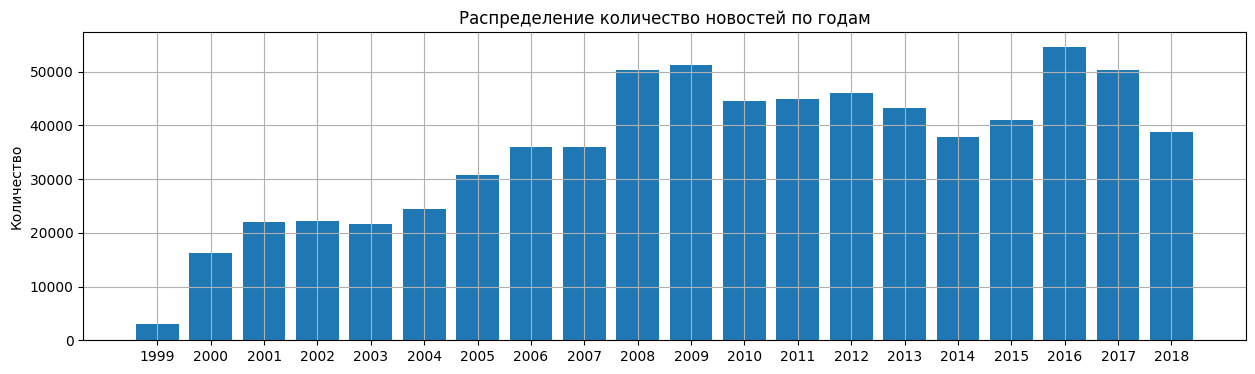

In [9]:
plt.figure(figsize=(15,4))
year = [i[0] for i in l]
counts = [i[1] for i in l]
plt.bar(year, counts,)
plt.ylabel('Количество')
plt.title('Распределение количество новостей по годам')
plt.xticks(range(1999, 2019))
plt.grid()
plt.show()

In [10]:
d = {}
for topic in df.topic.unique():
    cnt = Counter(df.loc[df.topic==topic, 'year'])
    d[topic] = np.array([cnt[k] for k in range(1999, 2019)])

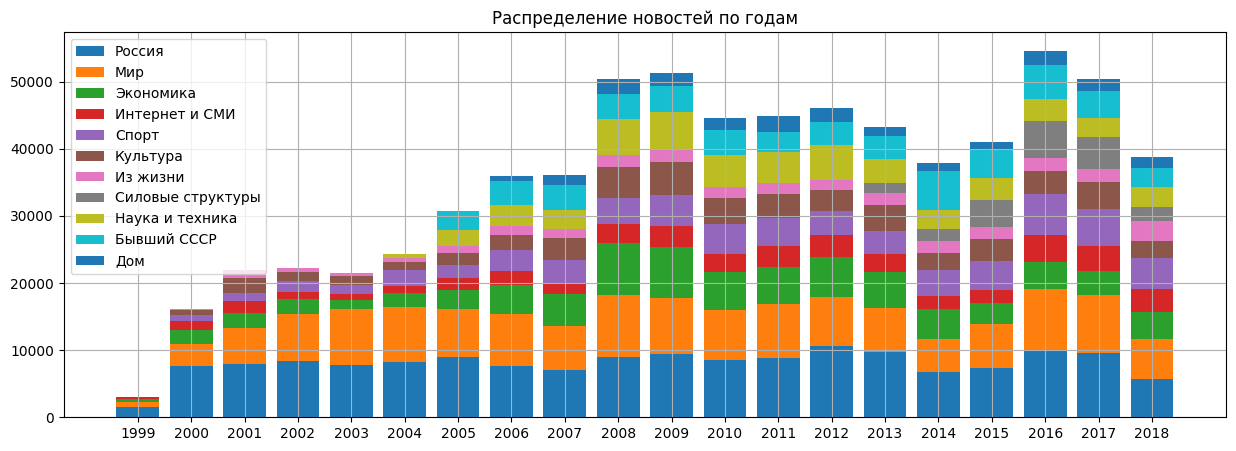

In [11]:
species = list(range(1999, 2019))
weight_counts = d
width = 0.8
fig, ax = plt.subplots(figsize=(15,5))
bottom = np.zeros(20)
for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count
ax.set_title("Распределение новостей по годам")
ax.legend()
ax.set_xticks(range(1999, 2019))
plt.grid()
plt.show()

In [12]:
[f'{i[1]} {i[0]}' for i in list(df.topic.value_counts().items())]

['160445 Россия',
 '136621 Мир',
 '79528 Экономика',
 '64413 Спорт',
 '53797 Культура',
 '53402 Бывший СССР',
 '53136 Наука и техника',
 '44663 Интернет и СМИ',
 '27605 Из жизни',
 '21734 Дом',
 '19596 Силовые структуры']

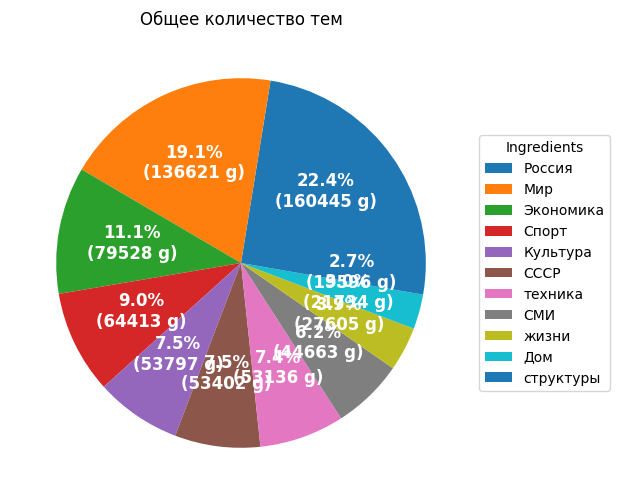

In [13]:
fig, ax = plt.subplots(figsize=(15, 6), subplot_kw=dict(aspect="equal"))

recipe = [f'{i[1]} {i[0]}' for i in list(df.topic.value_counts().items())]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} g)"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Общее количество тем")

plt.show()

In [14]:
df['date'] = df.date.apply(lambda x: pd.to_datetime(x.replace('/','-')))

In [15]:
df['date'].max()

Timestamp('2018-12-15 00:00:00')

In [16]:
df['date'].min()

Timestamp('1999-08-31 00:00:00')

In [17]:
# ?calplot.calplot

In [18]:
data = Counter(df['date'])

In [19]:
# values

In [20]:
# @title Текст заголовка по умолчанию
%%writefile calplot.py
import calendar
import datetime
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd

from matplotlib.colors import ColorConverter, ListedColormap
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

def yearplot(data, year=None, how='sum',
             vmin=None, vmax=None,
             cmap='viridis', fillcolor='whitesmoke',
             linewidth=1, linecolor=None, edgecolor='gray',
             daylabels=calendar.day_abbr[:], dayticks=True,
             dropzero=None,
             textformat=None, textfiller='', textcolor='black',
             monthlabels=calendar.month_abbr[1:], monthlabeloffset=15,
             monthticks=True,
             ax=None, **kwargs):
    """
    Plot one year from a timeseries as a calendar heatmap.

    Parameters
    ----------
    data : Series
        Data for the plot. Must be indexed by a DatetimeIndex.
    year : integer
        Only data indexed by this year will be plotted. If `None`, the first
        year for which there is data will be plotted.
    how : string
        Method for resampling data by day. If `None`, assume data is already
        sampled by day and don't resample. Otherwise, this is passed to Pandas
        `Series.resample`.
    vmin, vmax : floats
        Values to anchor the colormap. If `None`, min and max are used after
        resampling data by day.
    cmap : matplotlib colormap name or object
        The mapping from data values to color space.
    fillcolor : matplotlib color
        Color to use for days without data.
    linewidth : float
        Width of the lines that will divide each day.
    linecolor : color
        Color of the lines that will divide each day. If `None`, the axes
        background color is used, or 'white' if it is transparent.
    daylabels : list
        Strings to use as labels for days, must be of length 7.
    dayticks : list or int or bool
        If `True`, label all days. If `False`, don't label days. If a list,
        only label days with these indices. If an integer, label every n day.
    dropzero : bool
        If `True`, don't fill a color for days with a zero value.
    monthlabels : list
        Strings to use as labels for months, must be of length 12.
    monthlabeloffset : integer
        Day offset for labels for months to adjust horizontal alignment.
    monthticks : list or int or bool
        If `True`, label all months. If `False`, don't label months. If a
        list, only label months with these indices. If an integer, label every
        n month.
    edgecolor : color
        Color of the lines that will divide months.
    textformat : string
        Text format string for grid cell text
    textfiller : string
        Fallback text for grid cell text for cells with no data
    textcolor : color
        Color of the grid cell text
    ax : matplotlib Axes
        Axes in which to draw the plot, otherwise use the currently-active
        Axes.
    kwargs : other keyword arguments
        All other keyword arguments are passed to matplotlib `ax.pcolormesh`.

    Returns
    -------
    ax : matplotlib Axes
        Axes object with the calendar heatmap.

    """

    if year is None:
        year = data.index.sort_values()[0].year

    if how is None:
        # Assume already sampled by day.
        by_day = data
    else:
        # Sample by day.
        by_day = data.resample('D').agg(how)

    # Default to dropping zero values for a series with over 50% of rows being zero.
    if not (dropzero is False) and (by_day[by_day == 0].count() > 0.5 * by_day.count()):
        dropzero = True

    if dropzero:
        by_day = by_day.replace({0: np.nan}).dropna()

    # Min and max per day.
    if vmin is None:
        vmin = by_day.min()
    if vmax is None:
        vmax = by_day.max()

    if ax is None:
        ax = plt.gca()

    if linecolor is None:
        # Unfortunately, linecolor cannot be transparent, as it is drawn on
        # top of the heatmap cells. Therefore it is only possible to mimic
        # transparent lines by setting them to the axes background color. This
        # of course won't work when the axes itself has a transparent
        # background so in that case we default to white which will usually be
        # the figure or canvas background color.
        linecolor = ax.get_facecolor()
        if ColorConverter().to_rgba(linecolor)[-1] == 0:
            linecolor = 'white'

    # Filter on year.
    try:
      # could be empty due to `dropzero`
      by_day = by_day[str(year)]
    except KeyError:
      pass

    # Add missing days.
    by_day = by_day.reindex(
        pd.date_range(start=str(year), end=str(year + 1),
                      freq='D', tz=by_day.index.tzinfo)[:-1])

    # Create data frame we can pivot later.
    by_day = pd.DataFrame({'data': by_day,
                           'fill': 1,
                           'day': by_day.index.dayofweek,
                           'week': by_day.index.isocalendar().week})

    # There may be some days assigned to previous year's last week or
    # next year's first week. We create new week numbers for them so
    # the ordering stays intact and week/day pairs unique.
    by_day.loc[(by_day.index.month == 1) & (by_day.week > 50), 'week'] = 0
    by_day.loc[(by_day.index.month == 12) & (by_day.week < 10), 'week'] \
        = by_day.week.max() + 1

    # Pivot data on day and week and mask NaN days.
    plot_data = by_day.pivot(index='day', columns='week', values='data').values[::-1]
    plot_data = np.ma.masked_where(np.isnan(plot_data), plot_data)

    # Do the same for all days of the year, not just those we have data for.
    fill_data = by_day.pivot(index='day', columns='week', values='fill').values[::-1]
    fill_data = np.ma.masked_where(np.isnan(fill_data), fill_data)

    # Draw heatmap for all days of the year with fill color.
    ax.pcolormesh(fill_data, vmin=0, vmax=1, cmap=ListedColormap([fillcolor]))

    # Draw heatmap.
    kwargs['linewidth'] = linewidth
    kwargs['edgecolors'] = linecolor
    ax.pcolormesh(plot_data, vmin=vmin, vmax=vmax, cmap=cmap, **kwargs)

    # Limit heatmap to our data.
    ax.set(xlim=(0, plot_data.shape[1]), ylim=(0, plot_data.shape[0]))

    # Square cells.
    ax.set_aspect('equal')

    # Remove spines and ticks.
    for side in ('top', 'right', 'left', 'bottom'):
        ax.spines[side].set_visible(False)
    for axis in (ax.xaxis, ax.yaxis):
        axis.set_tick_params(which='both', length=0)

    # Get indices for monthlabels.
    if monthticks is True:
        monthticks = range(len(monthlabels))
    elif monthticks is False:
        monthticks = []

    # Get indices for daylabels.
    if dayticks is True:
        dayticks = range(len(daylabels))
    elif dayticks is False:
        dayticks = []

    ax.set_xlabel('')
    ax.set_xticks([by_day.loc[pd.Timestamp(
                   datetime.date(year, i + 1, monthlabeloffset))].week
                   for i in monthticks])
    ax.set_xticklabels([monthlabels[i] for i in monthticks])

    ax.set_ylabel('')
    ax.yaxis.set_ticks_position('right')
    ax.set_yticks([6 - i + 0.5 for i in dayticks])
    ax.set_yticklabels([daylabels[i] for i in dayticks], rotation='horizontal',
                       va='center')

    # Text in mesh grid if format is specified.
    if textformat is not None:
        for y in range(plot_data.shape[0]):
            for x in range(plot_data.shape[1]):
                content = ''
                masked = plot_data[y, x]
                if masked is np.ma.masked:
                    if fill_data[y, x] == 1:
                        content = textfiller
                else:
                    content = textformat.format(masked)
                ax.text(x + 0.5, y + 0.5, content, color=textcolor,
                         ha='center', va='center')

    # Month borders code credited to https://github.com/rougier/calendar-heatmap
    xticks = []
    start = datetime.datetime(year, 1, 1).weekday()
    for month in range(1, 13):
        first = datetime.datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)
        y0 = 7 - first.weekday()
        y1 = 7 - last.weekday()
        x0 = (int(first.strftime('%j'))+start-1)//7
        x1 = (int(last.strftime('%j'))+start-1)//7
        P = [(x0, y0),
             (x0+1, y0),
             (x0+1, 7),
             (x1+1, 7),
             (x1+1, y1-1),
             (x1, y1-1),
             (x1, 0),
             (x0, 0) ]
        xticks.append(x0 + (x1-x0+1)/2)
        poly = Polygon(P, edgecolor=edgecolor, facecolor='None',
                       linewidth=linewidth, zorder=20, clip_on=False)
        ax.add_artist(poly)

    return ax


def calplot(data, how='sum',
            yearlabels=True, yearascending=True,
            yearlabel_kws=None, subplot_kws=None, gridspec_kws=None,
            figsize=None, fig_kws=None, colorbar=None,
            suptitle=None, suptitle_kws=None,
            tight_layout=True, **kwargs):
    """
    Plot a timeseries as a calendar heatmap.

    Parameters
    ----------
    data : Series
        Data for the plot. Must be indexed by a DatetimeIndex.
    how : string
        Method for resampling data by day. If `None`, assume data is already
        sampled by day and don't resample. Otherwise, this is passed to Pandas
        `Series.resample`.
    figsize : (float, float)
        Size of figure for the plot.
    suptitle : string
        Title for the plot.
    yearlabels : bool
       Whether or not to draw the year label for each subplot.
    yearascending : bool
       Sort the calendar in ascending or descending order.
    yearlabel_kws : dict
       Keyword arguments passed to the matplotlib `set_ylabel` call which is
       used to draw the year for each subplot.
    subplot_kws : dict
        Keyword arguments passed to the matplotlib `subplots` call.
    gridspec_kws : dict
        Keyword arguments passed to the matplotlib `GridSpec` constructor used
        to create the grid the subplots are placed on.
    fig_kws : dict
        Keyword arguments passed to the matplotlib `subplots` call.
    suptitle_kws : dict
        Keyword arguments passed to the matplotlib `suptitle` call.
    kwargs : other keyword arguments
        All other keyword arguments are passed to `yearplot`.

    Returns
    -------
    fig, axes : matplotlib Figure and Axes
        Tuple where `fig` is the matplotlib Figure object `axes` is an array
        of matplotlib Axes objects with the calendar heatmaps, one per year.

    """

    if yearlabel_kws is None:
        yearlabel_kws = dict()
    if subplot_kws is None:
        subplot_kws = dict()
    if gridspec_kws is None:
        gridspec_kws = dict()
    if fig_kws is None:
        fig_kws = dict()
    if suptitle_kws is None:
        suptitle_kws = dict()

    years = np.unique(data.index.year)
    if not yearascending:
        years = years[::-1]

    if colorbar is None:
        colorbar = data.nunique() > 1

    if figsize is None:
        figsize = (10+(colorbar*2.5), 1.7*len(years))

    fig, axes = plt.subplots(nrows=len(years), ncols=1, squeeze=False,
                             figsize=figsize,
                             subplot_kw=subplot_kws,
                             gridspec_kw=gridspec_kws, **fig_kws)
    axes = axes.T[0]

    # We explicitely resample by day only once. This is an optimization.
    by_day = data
    if how is not None:
        by_day = by_day.resample('D').agg(how)

    ylabel_kws = dict(
        fontsize=30,
        color='gray',
        fontweight='bold',
        ha='center')
    ylabel_kws.update(yearlabel_kws)

    max_weeks = 0

    for year, ax in zip(years, axes):
        yearplot(by_day, year=year, how=None, ax=ax, **kwargs)
        max_weeks = max(max_weeks, ax.get_xlim()[1])

        if yearlabels:
            ax.set_ylabel(str(year), **ylabel_kws)

    # In a leap year it might happen that we have 54 weeks (e.g., 2012).
    # Here we make sure the width is consistent over all years.
    for ax in axes:
        ax.set_xlim(0, max_weeks)

    stitle_kws = dict()

    if tight_layout:
        plt.tight_layout()
        stitle_kws.update({'y': 1})

    if colorbar:
        if tight_layout:
            stitle_kws.update({'x': 0.425, 'y': 1.03})

        if len(years) == 1:
            fig.colorbar(axes[0].get_children()[1], ax=axes.ravel().tolist(),
                         orientation='vertical')
        else:
            fig.subplots_adjust(right=0.8)
            cax = fig.add_axes([0.85, 0.025, 0.02, 0.95])
            fig.colorbar(axes[0].get_children()[1], cax=cax, orientation='vertical')

    stitle_kws.update(suptitle_kws)
    plt.suptitle(suptitle, **stitle_kws)

    return fig, axes

Writing calplot.py


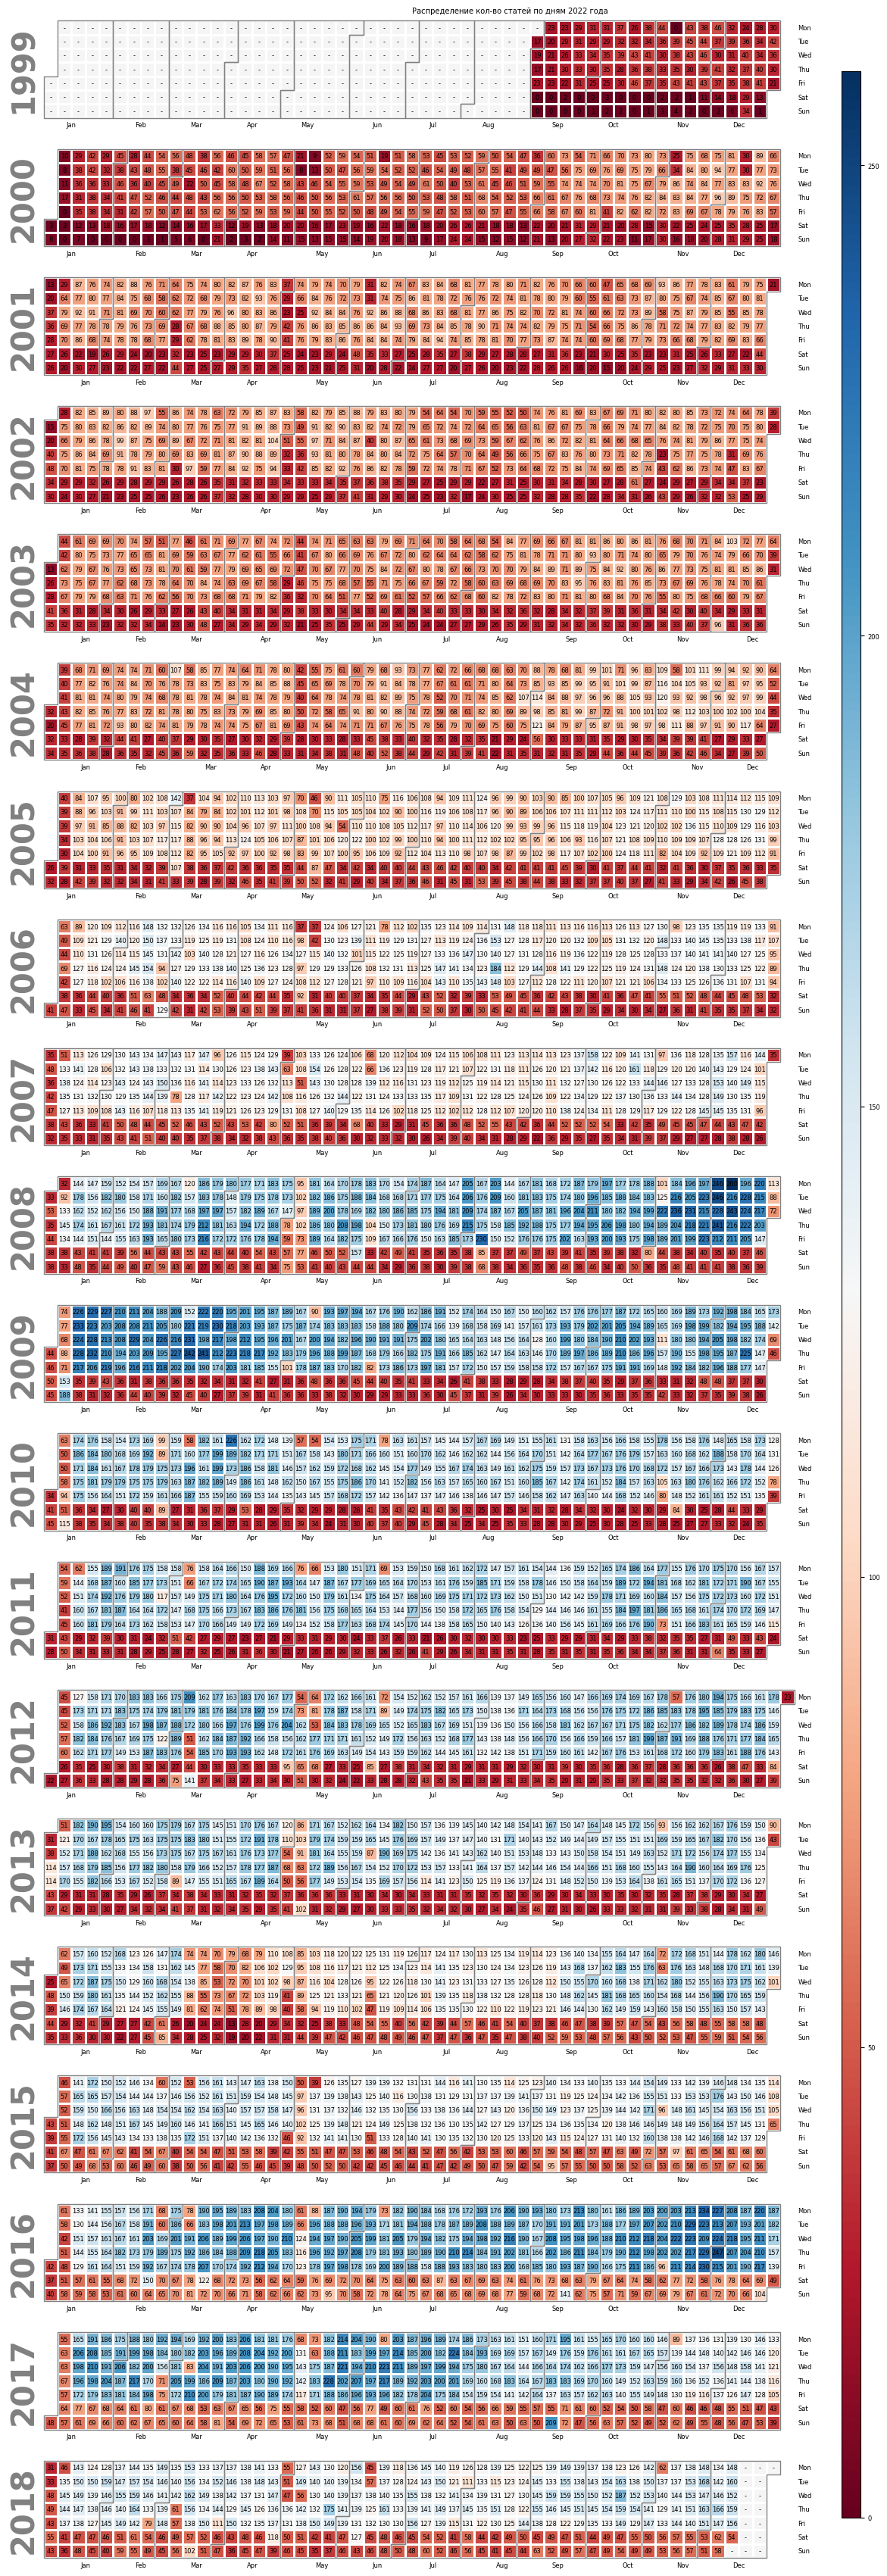

In [21]:
import calplot
days = pd.date_range('1999-08-31', '2018-12-15')
values = pd.Series([data[i] if data.get(i) else 0 for i in days], index = days)
plt.rcParams.update({'font.size': 6})

# warnings.filterwarnings('ignore')
calplot.calplot(values,
                suptitle = 'Распределение кол-во статей по дням 2022 года',
                suptitle_kws = {'x': 0.5, 'y': 1.0}, cmap = 'RdBu',
                textformat = '{:.0f}', textfiller = '-', textcolor = 'black')

plt.show()

In [22]:
df.sample(10)

,title,text,topic,date,year
671042,Покойного вице-президента ФИФА уличили во взятке на миллион долларов,"Бывший вице-президент Международной федерации футбола (ФИФА) Хулио Грондона получил миллион долларов за голос в пользу Катара на выборах страны-организатора чемпионата мира 2022 года. Об этом в среду, 15 ноября, сообщает портал Inside the Games. Соответствующие показания суду Нью-Йорка дал бывший глава аргентинской компании Torneos y Competencias Алехандро Бурсако. Помимо ныне покойного Грондоны, в подкупе были обвинены члены исполкома ФИФА Николос Леоса из Парагвая и бразилец Рикардо Тейшейра. Бурсако также сообщил, что телекомпании Fox Sports, мексиканская Grupo Televisa и бразильская Globo дали взятки за права показывать чемпионат мира. Хулио Грондона на протяжении 36 лет возглавлял Ассоциацию футбола Аргентины. Он умер в 2014 году. Выборы стран-организаторов чемпионата мира-2022 прошли в 2010 году. Победу одержал Катар. Соревнования впервые в истории состоятся зимой (с 21 ноября по 18 декабря) из-за слишком жаркой погоды в Катаре в летнее время.",Спорт,2017-11-15,2017
83689,Американские военные признали гибель еще шестерых афганских детей,"Шесть детей погибли 5 декабря в ходе удара американских военных по одному из объектов в районе афганского города Гардез, сообщает Associated Press. Это уже второй случай гибели детей на прошлой неделе, произошедший в рамках противостояния армии с США с боевиками движения ""Талибан"" и их сторонниками. Тела шести детей и двоих взрослых были обнаружены под развалинами здания, в котором, по данным американцев, хранил вооружение один из командиров талибов мулла Джалани. По словам представителя вооруженных сил США Брайана Хилферти, военные не располагали сведениями о нахождении гражданских лиц в месте проведения операции. Американцам удалось задержать 9 человек, подозреваемых в поддержке талибов и боевиков ""Аль-Каеды"", однако Джалани в их числе не оказалось. Хилферти выразил сожаление в связи с гибелью гражданских лиц, но при этом отметил, что полностью исключать возможность таких инцидентов нельзя. ""Мы очень стараемся никого не убивать. Мы предпочитаем захватывать террористов, а не ликвидировать их. Однако в этом случае, когда гражданские лица оказались в окружении тысяч единиц оружия и боеприпасов, в том числе гаубиц и минометов, в здании, используемом террористами, мы не может нести ответственности"", - прокомментировал ситуацию Хилферти. Представитель американской армии не смог дать точных объяснений причин крушения стены, под которой были найдены погибшие афганцы. Это могло произойти как из-за огня американских сил, так и из-за детонации хранившихся в здании боеприпасов. О потерях американцев на месте происшествия ничего не сообщается. Еще девять афганских детей погибли 6 декабря во время авиаудара американских военных по кишлаку Макур в провинции Газни. Тогда главной целью американцев был полевой командир мулла Вазир.",Мир,2003-12-10,2003
590251,В Мельбурне художница показала на выставке видео своего изнасилования,"Проживающая в Австралии художница София Хьюсон представила в мельбурнской галерее проект, в котором использовала видео своего изнасилования, сообщает The Daily Mail. По словам Хьюсон, проект под названием «Ты в порядке, Боб?» призван «разрушить мужское верховенство». Видео снято художницей в нью-йоркской квартире, куда по ее приглашению явился незнакомец, которого она называет Бобом. В трехминутном ролике зритель видит только руки Боба, и крупным планом — лицо Хьюсон. «Самый вызывающий аспект фильма не в том, что вам приходится видеть, как женщину бьют и насилуют, а то, что вы видите, как она смотрит на нас», — пояснила Хьюсон. Она отметила, что выступила хореографом сцены, хотя изнасилование было настоящим. «Изнасилование — это больше, чем навязанный сексуальный акт. Это основа всего нашего патриархального института, и именно поэтому это решающее поле битвы за деконструкцию власти мужчин», — сказала художница. «Ты в порядке, Боб?» демонстрируется в мельбурнской галерее

In [23]:
stopwords_ru = stopwords.words("russian")
patterns = r'[^a-zA-Zа-яА-Я0-9ёЁ]'
morph = MorphAnalyzer()

In [24]:
df['text'] = df['text'].astype(str)
df['title'] = df['title'].astype(str)

In [26]:
def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.lower().split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return []

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc='My bar!')
df['title'] = df['title'].progress_apply(lambda x: ' '.join(lemmatize(x)))

My bar!:  80%|███████▉  | 570042/714940 [13:14<05:51, 412.61it/s]

In [ ]:
tqdm.pandas(desc='My bar!')
df['text'] = df['text'].progress_apply(lambda x: ' '.join(lemmatize(x)))

My bar!:   3%|▎         | 23032/714940 [08:55<4:56:10, 38.94it/s]

In [30]:


pandarallel.initialize()
df['title'] = df['title'].parallel_apply(lambda x: ' '.join(lemmatize(x)))
pandarallel.initialize()
df['text'] = df['text'].parallel_apply(lambda x: ' '.join(lemmatize(x)))

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


TypeError: ignored

In [32]:
df

,title,text,topic,date,year
0,космонавт сомневаться надёжность мир,"Как стало известно агентству Ассошиэйтед Пресс, экипаж последней экспедиции на станцию ""Мир"" считает ее способной выйти из-под контроля.Командир Виктор Афанасьев сказал: ""Мы чувствуем себя хорошо, но грустим, что оставили станцию летать в беспилотном режиме."" Gazeta Ru подробно писала о том, что финансирование программы ""Мир"" закрыто, но конструкторы не спешат топить ее в Тихом океане, надеясь на изыскание внебюджетных средств.Они надеются, что правительство оплатит финальную экспедицию на ""Мир"" в феврале или марте 2000 года. Новая экспедиция должна постепенно перевести станцию на низкую орбиту, после чего 140- тонный ""Мир"" в основном сгорит в атмосфере, а незначительные его части упадут в Тихий океан. Но нет никакой гарантии, что пережившая столько отказов оборудования конструкция поведет себя адекватно командам. Афанасьев перечислил потенциально опасные элементы ""Мира"" на пресс- конференции, состоявшейся в понедельник в Звездном Городке. ""Может упасть давление в кабине,- сказал он,- и это станет серьезным препятствием для работы следующей экспедиции. Слишком велика роль ""человеческого фактора"" , элементарная ошибка может привести как к потере топлива, так и к потере ориентации."" Американское космическое агентство по аэронавтике и космическому пространству предлагало России затопить ""Мир"", а его ресурсы перевести на международную космическую станцию. Но Россия не хочет расставаться с легендарным символом.",Россия,1999-08-31,1999
1,взрыв центр москва пострадать 30 человек,"В зале игровых автоматов в третьем ярусе подземного комплекса ""Охотный ряд"" на Манежной площади в центре Москвы около 20.00 прогремел мощный взрыв. По данным ФСБ, погибли не менее четырех человек, 20 человек ранены. Однако уточненная оценка числа пострадавших в результате этого взрыва может достигнуть ста человек. Агентство ИТАР-ТАСС, в сообщении от 21.15 со ссылкой на источники в ГУВД Москвы, говорит только о 30 раненых, в том числе о двух пострадавших в тяжелом состоянии. Однако число пострадавших в результате этого взрыва может составить до ста человек. По данным РИА ""Новости"", Боткинская больница, Институт им. Склифосовского, 1-ая Градская, 36-ая и 64-ая горбольница работают только на прием пострадавших. С места происшествия запросили 20 машин скорой помощи. Из торгового центра эвакуированы все посетитетели. Среди причин происшедшего называют террористический акт, связанный с последними событиями в Дагестане, однако, по сообщению ОРТ, не исключается и версия об аварии (взорвался игровой автомат). Более точных данных о причнах взрыва и количестве жертв представители УФСБ называть не торопятся.",Россия,1999-08-31,1999
2,япония кредитовать россия полтора миллиард доллар,"Япония приняла решение разморозить кредиты России на сумму в полтора миллиарда долларов. Об этом заявил сегодня после встречи с премьер-министром Японии вице-премьер правительства России Виктор Христенко. Он прибыл в Токио во главе делегации для участия в заседании российско-японской межправительственной комиссии по торгово-экономическим вопросам, которое начнется в среду в Токио. Один из участников подготовки этого заседания сообщил ""Интерфаксу"", что Христенко постарается на конкретных макроэкономических показателях за последние месяцы доказать, что экономика России становится более стабильной и убедить Японию в своей платежеспособности и партнерской надежности. ""Если на заседании комиссии японская сторона будет удовлетворена этими данными, то многие российско-японские проекты по улучшению экономики дальневосточного побережья, примут более реальные очертания"", - подчеркнул источник. Сегодняшнее сообщение о разморозке кредита показывает, что приведенные Христенко выкладки оказались убедительными для японцев. В отношении Японии еще со времен СССР осталаськоммерческая задолженность японским фирмам, общий объем которой составляет около $1,1 миллиардов. Основная задолженность перед крупными фирмами, об

In [31]:
df.to_csv('data.csv', index=False)

In [ ]:
df.sample(4)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import seaborn as sns


In [ ]:
for n in range(1, 2):
    cv = CountVectorizer(ngram_range=(n, n))
    n_grams = cv.fit_transform(df['title'])


In [ ]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [ ]:


import matplotlib.pyplot as plt

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
for ax in axs:
    ax.
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [ ]:
df.sample(10)